In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df1 = df.copy()
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

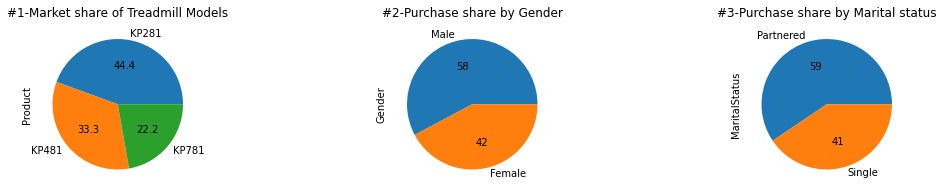

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(18,3))
df1['Product'].value_counts().plot(kind='pie',autopct = '%.1f', ax=axs[0], title='#1-Market share of Treadmill Models')
df1['Gender'].value_counts().plot(kind='pie',autopct ='%0.0f', ax=axs[1], title='#2-Purchase share by Gender')
df1['MaritalStatus'].value_counts().plot(kind='pie',autopct ='%0.0f', ax=axs[2], title='#3-Purchase share by Marital status')
plt.show()

### Market Share of Treadmill Models - 
#### KP281 which is the chepest product has maximum market share at 44% followed by KP481(33%) - mid segment and KP781(22%)- high end model
#### Males have purchased the products more compared to females
#### Partners have purchased the products more compared to Single

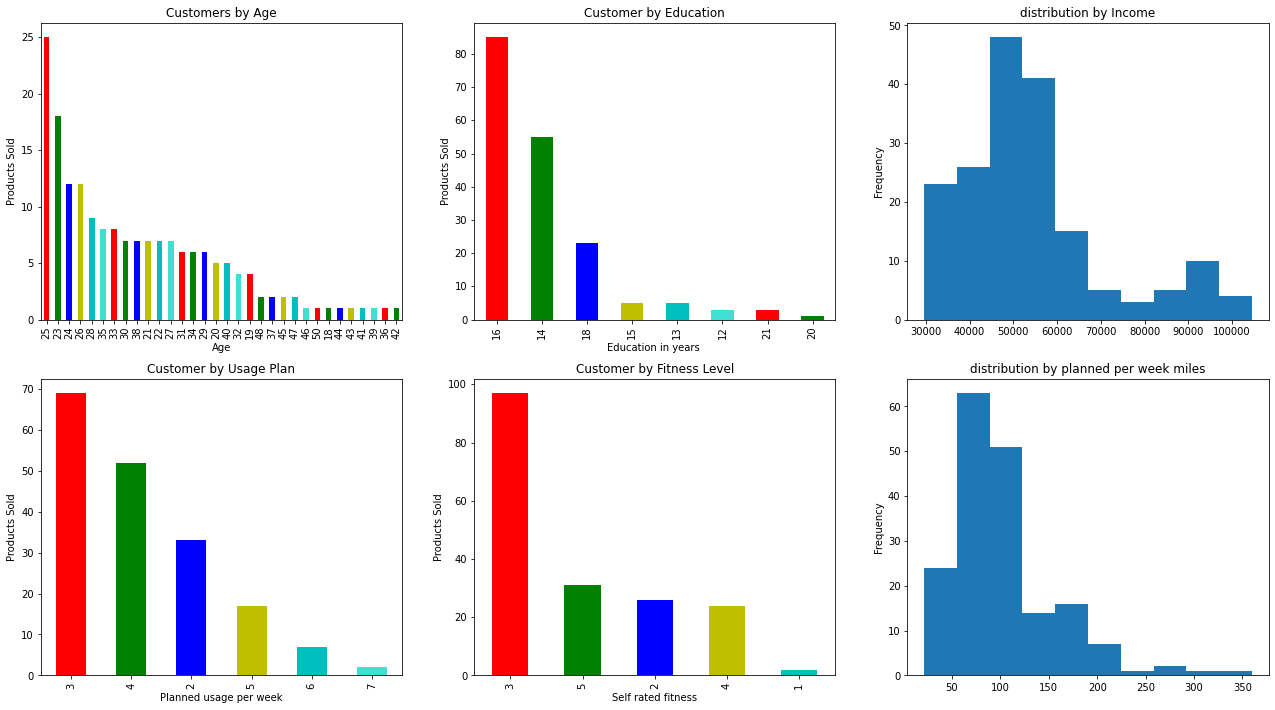

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(22,12))
cscheme = ['r','g','b','y','c','turquoise']
#plt.figure(figsize=(10,2))
df1['Age'].value_counts().plot(kind='bar', color = cscheme, ax=axs[0,0], 
                               title='Customers by Age', xlabel='Age', ylabel='Products Sold')
df1['Education'].value_counts().plot(kind='bar', color = cscheme, ax=axs[0,1],
                                     title='Customer by Education', xlabel='Education in years ', ylabel='Products Sold')
df1['Usage'].value_counts().plot(kind='bar', color = cscheme, ax=axs[1,0], 
                                 title='Customer by Usage Plan', xlabel='Planned usage per week', ylabel='Products Sold')
df1['Fitness'].value_counts().plot(kind='bar', color = cscheme, ax=axs[1,1],
                                  title='Customer by Fitness Level', xlabel='Self rated fitness', ylabel='Products Sold')
df1['Income'].plot(kind='hist', ax=axs[0,2], 
                   title='distribution by Income', xlabel='Income ranges', ylabel='Products Sold')
df1['Miles'].plot(kind='hist', ax=axs[1,2],
                  title='distribution by planned per week miles', xlabel='Income ranges', ylabel='Products Sold')
plt.show()

### Inferences from Individual columns
#### Large number of customer base is in their 20's less than equal to 25 years 
#### More number of customers in middle of the year of education range with 16 years as highest followed by 14
#### Customers with planned usage with 3 to 4 are significantly more
#### Customers with mid range of self claimed fitness (level-3) are more
#### Maximum customers in 50k to 60k incomen range
#### Customers with a planned usage between 75 to 125 miles a week are maximum

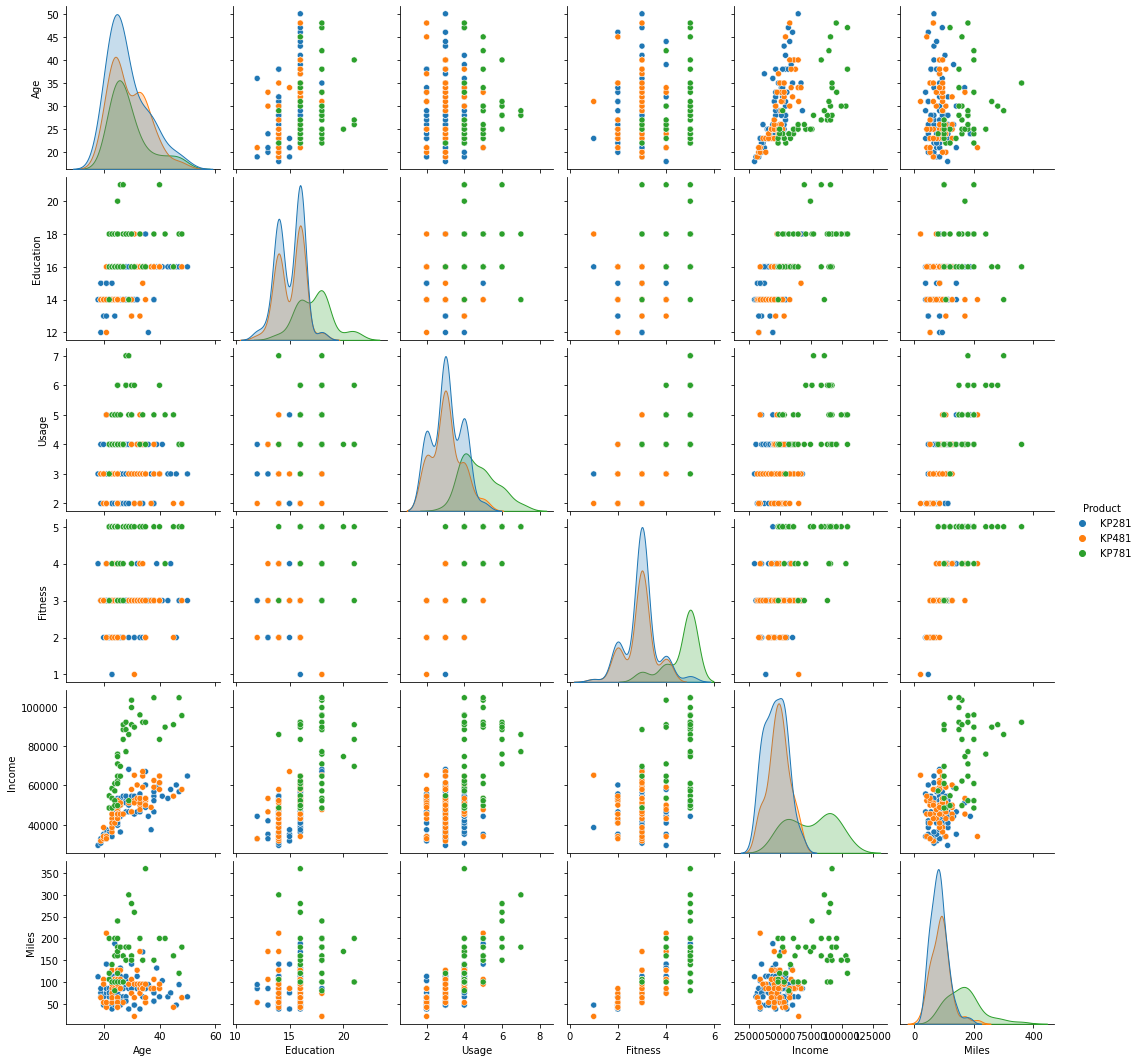

In [8]:
sns.pairplot(data=df1, hue='Product')
plt.show()

#### Customers purchasing the high end model begin from income range 40k and all customer having income higher than 70k have the top mode KP781
#### Significant number of customers in a lower age group can be seen for the high-end product

In [9]:
corr = df1.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


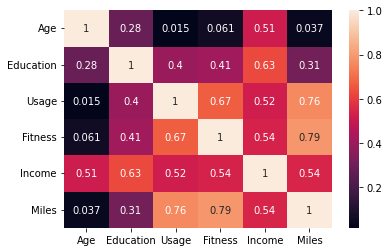

In [10]:
sns.heatmap(corr, annot=True)
plt.show()

#### Customers with high level of fitness plan to run more miles per week (CORR = 0.79)
#### Customer with more planned usage plan to run more miles per week (CORR = 0.76) - Obvious point
#### Customers with higher age have low planned usage and weekly miles and low fitness level (CORR = 0.015, 0.061, 0.037) 
#### Customers with higher education have better income and better fitness and planned usage (CORR = 0.63, 0.54 and 0.52)

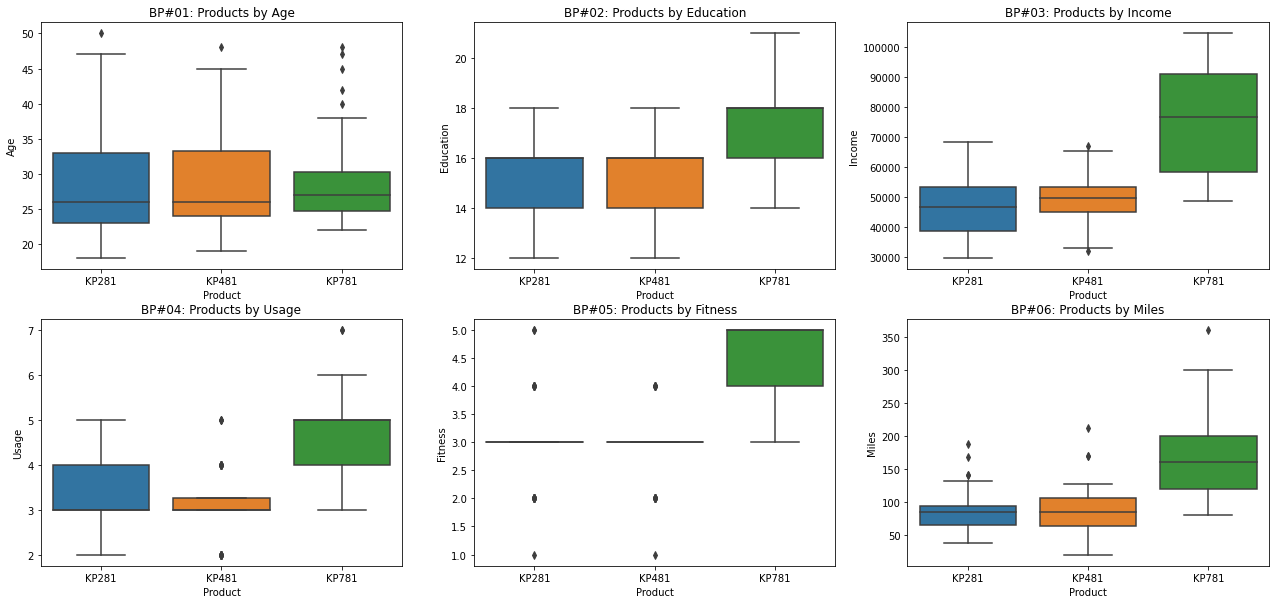

In [11]:
fig, axs = plt.subplots(nrows =2, ncols=3, figsize=(22,10))
sns.boxplot(data=df1, x='Product', y='Age', ax=axs[0,0]).set_title('BP#01: Products by Age')
sns.boxplot(data=df1, x='Product', y='Education', ax=axs[0,1]).set_title('BP#02: Products by Education')
sns.boxplot(data=df1, x='Product', y='Income', ax=axs[0,2]).set_title('BP#03: Products by Income')
sns.boxplot(data=df1, x='Product', y='Usage', ax=axs[1,0]).set_title('BP#04: Products by Usage')
sns.boxplot(data=df1, x='Product', y='Fitness', ax=axs[1,1]).set_title('BP#05: Products by Fitness')
sns.boxplot(data=df1, x='Product', y='Miles', ax=axs[1,2]).set_title('BP#06: Products by Miles')
#fig.tight_layout()
plt.show()

### Analysis using Box plots
#### BP#01 - Meadian Age is just above 25 for all 3 categories. Lot of Age outliers for high end model KP781
#### BP#02 - Higher Educated customers have chosen the high end model - KP781
#### BP#03 - for low-end and mid-segment model have median income around 50k whereas for top-end it is 75k
#### BP#04, BP#05, BP#06 - Customers have chosen the top-end model planning higher usage and miles. These customers have also claimed good fitness

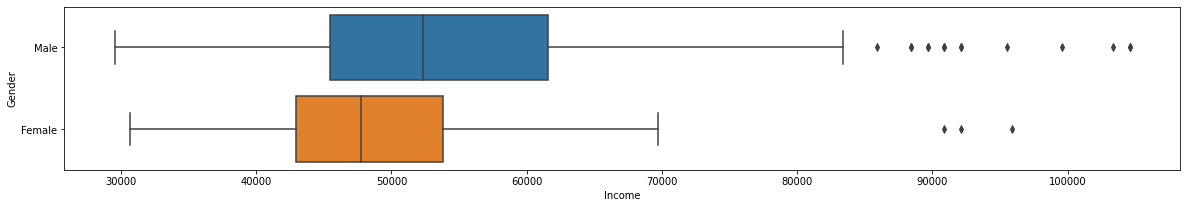

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [12]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df1, x='Income', y='Gender')
plt.show()
df1.groupby('Gender')['Income'].mean()

#### - We can see Income outliers in the above boxplot mostly for Males and few for Females as well

In [13]:
#Removing the 
q1=df['Income'].quantile(.25)
q3=df['Income'].quantile(.75)
iqr=q3-q1
df2 =df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
158,KP781,26,Male,16,Partnered,5,4,64741,180
163,KP781,28,Male,18,Partnered,7,5,77191,180


#### After removing the outliers the total number of rows reduced by 19 - From 180 to 161

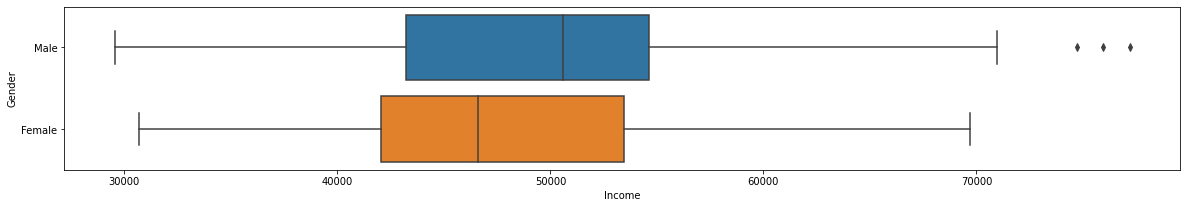

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

In [14]:
plt.figure(figsize=(20,3))
sns.boxplot(data=df2, x='Income', y='Gender')
plt.show()
df2.groupby('Gender')['Income'].mean()

#### - We can still observe some outliers for males which is due to the removal of outliers in a combined fashion across both males and females and not removed exclusively for males or females
#### Also the Income mean for Males has reduced by approx 6k as most of the outliers were removed

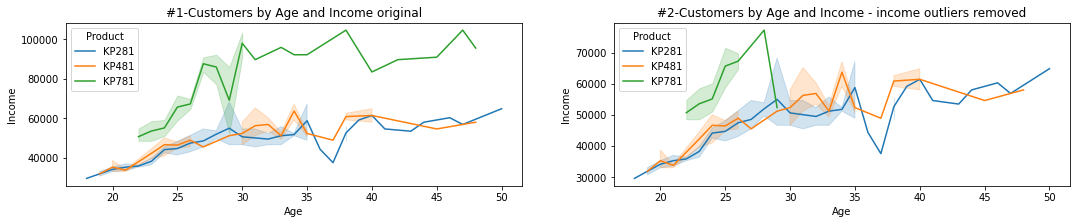

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(18,3))
sns.lineplot(data=df1, x='Age', y='Income', hue='Product', ax=axs[0]).set_title('#1-Customers by Age and Income original')
sns.lineplot(data=df2, x='Age', y='Income', hue='Product', ax=axs[1]).set_title('#2-Customers by Age and Income - income outliers removed')
plt.show()

#### We can observe that removing the income outliers does not provide any beneficial insight into data so will continue the analysis with the original data without removal of outliers

In [16]:
df1['Age'].min(), df1['Age'].max()

(18, 50)

#### Min age is 18 and max is 50. This gap of 32 can be split into 8 groups of  
age:LT-21, age:22-25, age:26-29, age:30-33, age:34-37, age:38-41, age:42-45, age:GT-46 

In [17]:
#Creating a new 'Age group' column by using the Age column in dataframe
df1['Age_group']=pd.cut(x=df1['Age'],bins=[0,21,25,29,33,37,41,45,51],
 labels=['age:LT-21', 'age:22-25', 'age:26-29', 'age:30-33', 'age:34-37', 'age:38-41', 'age:42-45', 'age:GT-46'])
df1.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,age:LT-21
1,KP281,19,Male,15,Single,2,3,31836,75,age:LT-21


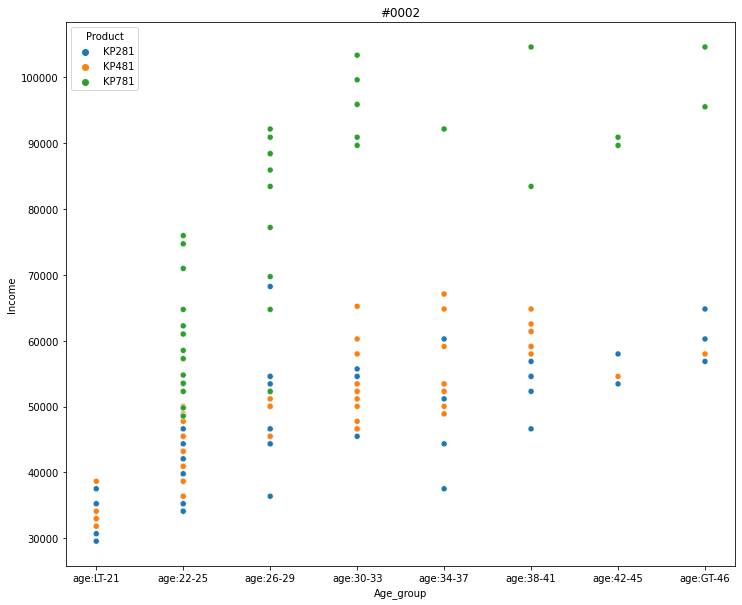

In [34]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df1, x='Age_group', y='Income',hue='Product').set_title('#0002')
plt.show()

#### For LT-21 year range have opted equally for the mid-segment (costlier ones) despite having a lower income
#### Similarly for Age group 22-25 have opted for the top-end and mid-segment products (costlier) ones despite lower range of income
#### For customers aged between 30 and above the trend seems to be reversing
#### It is also clearly evident that higher income ranges have always opted for the top-end model

In [19]:
df1['Age_group'].value_counts()

age:22-25    62
age:26-29    34
age:30-33    25
age:LT-21    17
age:34-37    17
age:38-41    14
age:GT-46     6
age:42-45     5
Name: Age_group, dtype: int64

### While performing the analysis it should always be accounted that the dataset is very small and very few data points are for age 40 and above

In [20]:
df1['Income'].min(), df1['Income'].max()

(29562, 104581)

In [21]:
#### Min income is 29562 and max is 104581. This gap an be split into following groups of  
'LT-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', 'GT-90k' 

('LT-30k',
 '30k-40k',
 '40k-50k',
 '50k-60k',
 '60k-70k',
 '70k-80k',
 '80k-90k',
 'GT-90k')

In [22]:
df1['Income_group']=pd.cut(x=df1['Income'],bins=[0,30000,40000,50000,60000,70000,80000,90000,110000],
 labels=['LT-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', 'GT-90k'])
df1.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,age:LT-21,LT-30k
1,KP281,19,Male,15,Single,2,3,31836,75,age:LT-21,30k-40k


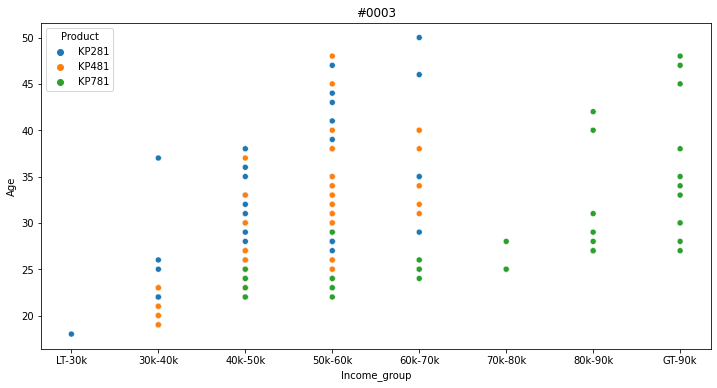

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x='Income_group', y='Age',hue='Product').set_title('#0003')
plt.show()

#### For income ranges less than 70k only customers below 25 years have purchased
#### For income ranges below 70k customers are euqally likely to purchase the low-end or mid-segment level product

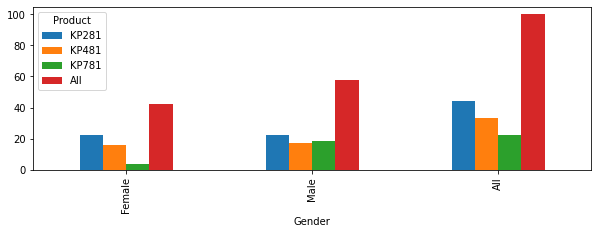

In [24]:
da1 = pd.crosstab(index=df['Gender'],columns=df1['Product'],margins=True, normalize=True)*100
da1.plot(kind='bar',figsize=(10,3))
plt.show()

#### Top end model is purchase more by males compared to females

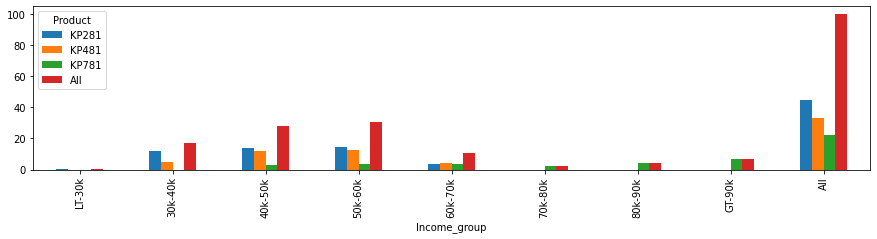

In [25]:
da2 = pd.crosstab(index=df1['Income_group'],columns=df1['Product'],margins=True, normalize=True)*100
da2.plot(kind='bar',figsize=(15,3))
plt.show()

#### Most number of customers are in the 30k to 70k income range

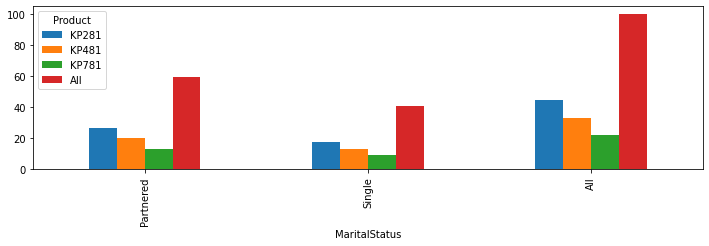

In [26]:
da3 = pd.crosstab(index=df1['MaritalStatus'],columns=df1['Product'],margins=True, normalize=True)*100
da3.plot(kind='bar',figsize=(12,3))
plt.show()

#### Almost same proportion of purchasing behavior across all 3 products for partnered and single customers

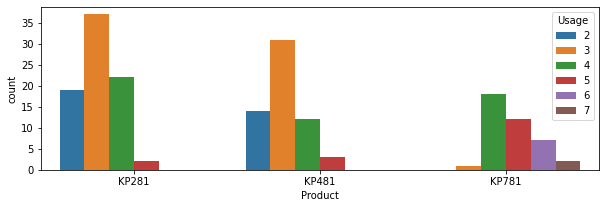

In [27]:
plt.figure(figsize=(10,3))
sns.countplot(data=df1, x='Product', hue='Usage')
plt.show()

#### Customers expressing maximum usage (6 and 7) have purchased the top-end model
#### Maximum number of customers are thouse who have expressed usage of 3 per week followed by 4 per week (moderate usage)

In [28]:
#Conditional Probabiity
dc1 = pd.crosstab(df1['Product'], df1['Gender'], normalize='columns', margins=True)*100
dc1

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222


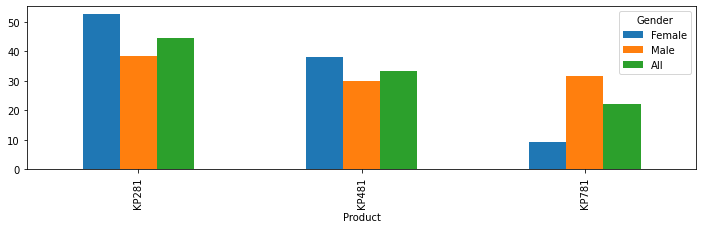

In [29]:
dc1.plot(kind='bar',figsize=(12,3))
plt.show()

In [30]:
#Conditional Probabiity
dc2 = pd.crosstab(df1['Product'], df1['Gender'], normalize='columns', margins=False)*100
dc2

Gender,Female,Male
Product,,
KP281,52.631579,38.461538
KP481,38.157895,29.807692
KP781,9.210526,31.730769


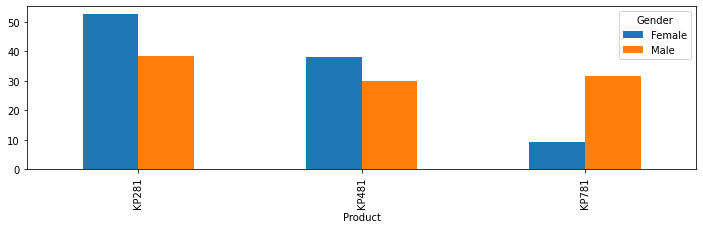

In [31]:
dc2.plot(kind='bar',figsize=(12,3))
plt.show()

### Final Observations for the Product
#### KP281
1- Most sold product
2- More popular in Females compared to Males
3- Favourite for low incomegroup

#### KP481
1- Second Most sold product
2- For age group above 34 and moderate income more preferred over the low-end model
3- Purchase characteristics very similar to low end model but the customers plan to have slightly lesser usage around 3 per week

#### KP781
1- Favourite of the high income group as expected
2- Youth in the range of 22-25 years with even moderate income range have purchase it
3- More popular in male customers
4- Customers with plans of High usage or High Miles have purchased it
5- Customers with higher education and better fitness level also purchased it 

### Business Recommendations

1- The Purchase pattern for low-end KP281 and mid-level KP481 is similar. More focus on features and markeing may push the sales of this attracting more customers from the low-end segment to this mid-segment product

2- There seems to be no data for customers beyond 50. If it means that there are no sales for that age group the potential seems to be untapped. 

3- There seems to be a reverse in trend from age 26+ customers with moderate income (50k + and more) where they have opted for the mid segment rather than the top-end model. This group of customers can be targeted by providing some discounts on prices of the top-end model.

4- Business should try to get more sales data and running the EDA again to get clearer insights. The current data has just 180 rows using which cannot provide correct trends